# <font color='blue'> MBA em Ciência de Dados</font>
# <font color='blue'>Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color='blue'>Análise de Componentes Principais - PCA</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

## Conteúdo
- Conceitos Fundamentais
  - Covariância
  - Matriz de Covariância
- Componentes Principais
  - Propriedades
- Cálculo das Componentes Principais

----

Bibliografia:
- [A Tutorial on Principal Components Analysis,  Jonathon Shlens](https://arxiv.org/pdf/1404.1100.pdf)
- [Principal Component Analysis,
H. Abdi, L.J. Williams](https://wwwpub.utdallas.edu/~herve/abdi-wireCS-PCA2010-inpress.pdf)

## Conceitos Básicos
A compreenção do método de Análise de Componentes Principais envolve quatro conceitos matemáticos:
1. Matriz de Covariância e suas Propriedades
2. Mudança de Base
3. Teorema Espectral
4. Quociente de Rayleigh

### <font color='blue'>Matriz de Covariância</font>
Considere duas sequências de valores $\mathbf{x}=\{x_1,x_2,\ldots,x_k\}$ e $\mathbf{y}=\{y_1,y_2,\ldots,y_k\}$.

A covariância entre $\mathbf{x}$ e $\mathbf{y}$ é definida como:
$$
cov(\mathbf{x},\mathbf{y}) = \frac{1}{n}\sum_i (x_i-\mu_x)(y_i-\mu_y)
$$
onde $\mu_x$ e $\mu_y$ são a média dos valores de $\mathbf{x}$ e $\mathbf{y}$, respectivamente.

Considere $\mathbf{X}=\{\mathbf{x}_1,\ldots,\mathbf{x}_n\} $ um conjunto de pontos em  $\mathbb{R}^d$.

Pode-se organizar os pontos como colunas de uma matriz $\mathbf{X}$ (matriz de dados) com dimensões $d\times n$:

$$
   \mathbf{X}=
    \begin{bmatrix}
      |&|&&|\\
      \mathbf{x}_1&\mathbf{x}_2&\dots&\mathbf{x}_n\\
      |&|&&|
    \end{bmatrix}=
    \begin{bmatrix}
      x_{11}                & {x_{12}} &\dots  & x_{1n}\\
      {x_{21}} & x_{22}               &\dots  & {x_{2n}}\\
      \vdots               &\vdots               &\ddots &\vdots\\
      x_{d1}                & {x_{d2}}&\dots  & x_{dn}
    \end{bmatrix}
$$

Denotando as linhas da matriz $\mathbf{X}$ por ${x}_{1:},\ldots,{x}_{d:}$,
a matriz de covariância de $\mathbf{X}$ é:

$$
cov(\mathbf{X})=
\begin{bmatrix}
      {cov(x_{1:},x_{1:})} & cov(x_{1:},x_{2:})          & \dots  &cov(x_{1:},x_{d:})\\
      cov(x_{2:},x_{1:})          & {cov(x_{2:},x_{2:})} & \dots  &cov(x_{2:},x_{d:})\\
      \vdots                      &      \vdots                 &\ddots  &\vdots\\
      cov(x_{d:},x_{1:})          &cov(x_{d:},x_{2:})           &\dots   &{cov(x_{d:},x_{d:})}
\end{bmatrix}
$$

**Importante**:
- Cada entrada da matrix $cov(\mathbf{X})$ corresponde a correlação entre duas coordenadas do conjunto de pontos  $\mathbf{X}$.
- Os elementos na diagonal da matriz correspondem à variância de cada coordenada.

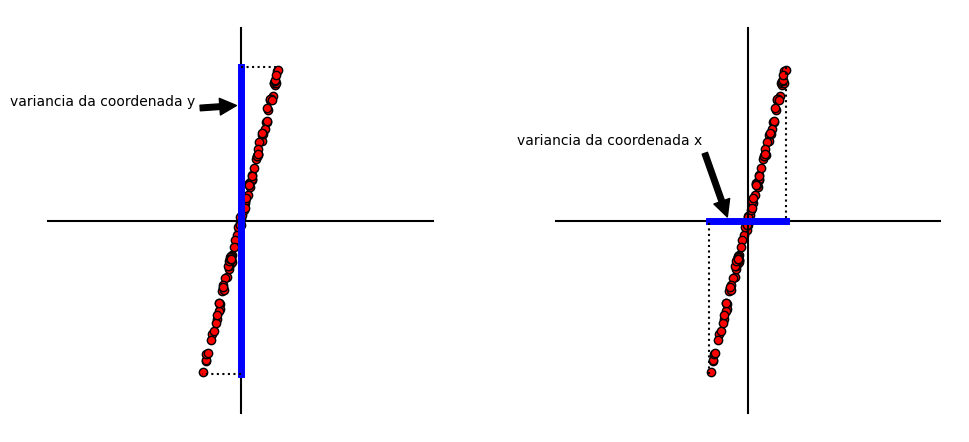

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n=100
X = np.zeros((2,n))
X[0,:] = np.random.uniform(-1,1,size=(1,n))
X[1,:] = 4*X[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

ax1.set_aspect('equal')
ax1.axis('off')
ax1.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-5,5],color='black');
ax1.plot([-5,5],[0,0],color='black');
ax1.plot([0,0],[-4,4],color='blue',linewidth=5);
ax1.plot([0,1],[4,4],':k');
ax1.plot([0,-1],[-4,-4],':k');
ax1.annotate('variancia da coordenada y', xy=(-0.05, 3), xytext=(-6, 3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

ax2.set_aspect('equal')
ax2.axis('off')
ax2.scatter(X[0,:],X[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-5,5],color='black');
ax2.plot([-5,5],[0,0],color='black');
ax2.plot([-1,1],[0,0],color='blue',linewidth=5);
ax2.plot([1,1],[4,0],':k');
ax2.plot([-1,-1],[-4,0],':k');
ax2.annotate('variancia da coordenada x', xy=(-0.5, 0), xytext=(-6, 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             );

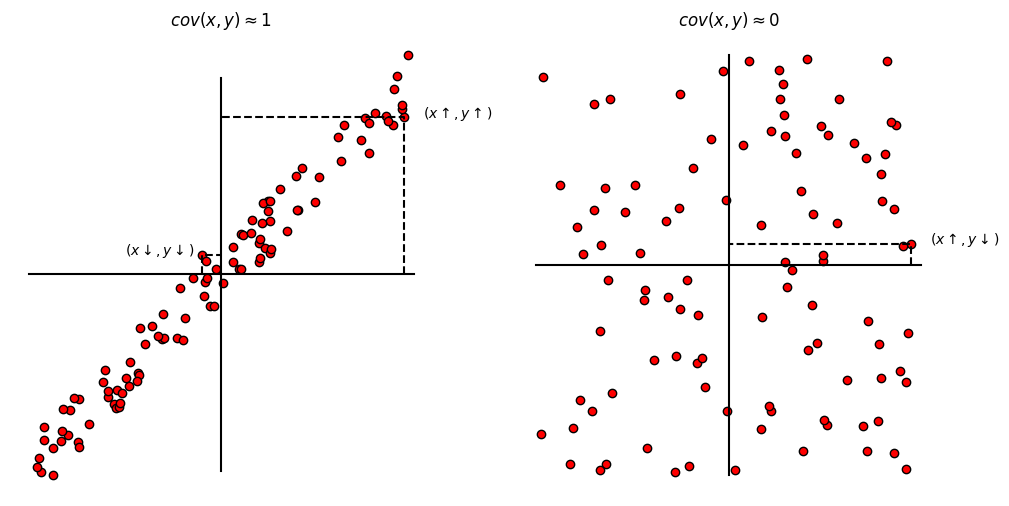

In [27]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))
Xc[0,0] = 0.95
Xc[1,0] = 0.8
Xc[0,1] = -0.1
Xc[1,1] = 0.1

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');
ax1.set_title(r'$cov(x,y)\approx 1$');
ax1.text(Xc[0,0]+0.1, Xc[1,0], r'$(x\uparrow,y\uparrow)$');
ax1.plot([Xc[0,0],Xc[0,0],0],[0,Xc[1,0],Xc[1,0]],'--k');
ax1.text(Xc[0,1]-0.4, Xc[1,1], r'$(x\downarrow,y\downarrow)$');
ax1.plot([Xc[0,1],Xc[0,1],0],[0,Xc[1,1],Xc[1,1]],'--k');

#### figura da direita
Xnc = np.zeros((2,n))
Xnc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[1,:] = np.random.uniform(-1,1,size=(1,n))
Xnc[0,0] = 0.95
Xnc[1,0] = 0.1

ax2.axis('off')
ax2.scatter(Xnc[0,:],Xnc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([0,0],[-1,1],color='black');
ax2.plot([-1,1],[0,0],color='black');
ax2.set_title(r'$cov(x,y)\approx 0$');
ax2.text(Xnc[0,0]+0.1, Xnc[1,0], r'$(x\uparrow,y\downarrow)$');
ax2.plot([Xnc[0,0],Xnc[0,0],0],[0,Xnc[1,0],Xnc[1,0]],'--k');

**Propriedades**:

2. $cov(\mathbf{X})$ é uma matriz simétrica
3. $cov(\mathbf{X})$ é semi definida positiva

---
**Prova da propriedade 3**: $cov(\mathbf{X})$ é semi definida positiva

O segredo da prova é enxergar que:
$$
cov(\mathbf{X})=\frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top
$$
onde $\mu=\frac{1}{n}\sum_i \mathbf{x}_{i}$

Assim,
$$
\mathbf{u}^\top cov(\mathbf{X})\mathbf{u}\\
=\mathbf{u}^\top\left( \frac{1}{n}\sum_i (\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \right)\mathbf{u}\\
=  \frac{1}{n}\sum_i \mathbf{u}^\top(\mathbf{x}_{i}-\mu)(\mathbf{x}_{i}-\mu)^\top \mathbf{u}\\
=\frac{1}{n}\sum_i \left((\mathbf{x}_{i}-\mu)^\top \mathbf{u}\right)^2\geq 0
$$

---

Assumindo que os dados estão centralizados, isto é, $\mu=0$, a matriz de covariância pode ser calculada como:

$$
cov(\mathbf{X})=\frac{1}{n}\mathbf{X}\mathbf{X}^\top
$$

## Análise de Componentes Principais
(Principal Component Analysis - PCA)

A idéia do método de _Análise de Componentes Principais_ é encontrar uma nova base para representar os dados de modo que a covariância entre coordenadas distintas nesta nova base seja zero.


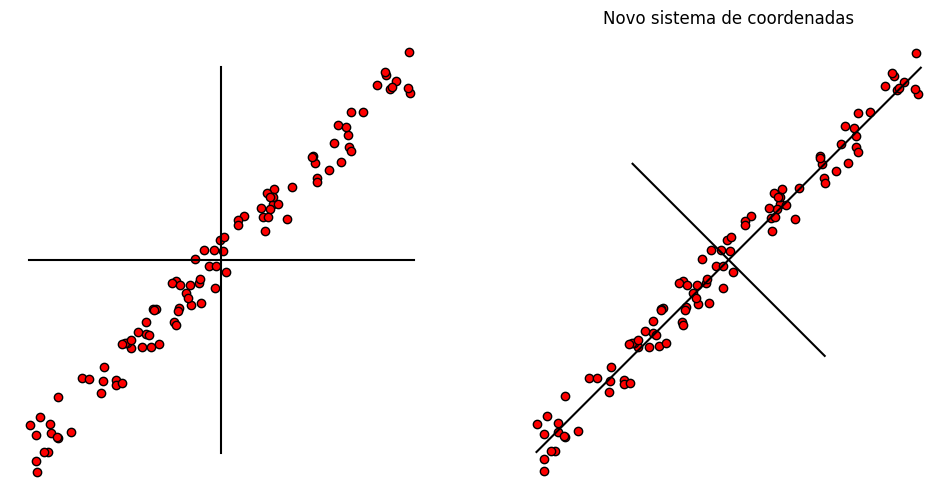

In [28]:
import matplotlib.pyplot as plt
import numpy as np


f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.15,0.15,size=(1,n))

ax1.axis('off')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([0,0],[-1,1],color='black');
ax1.plot([-1,1],[0,0],color='black');

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_title('Novo sistema de coordenadas');
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([-1,1],[-1,1],color='black');
ax2.plot([-0.5,0.5],[0.5,-0.5],color='black');

---
### <font color='blue'>Matriz de mudança de base
</font>

Seja $\mathbf{x}=\{x_1,\ldots,x_d\}$ um ponto representado na base Cartesiana, ou seja:

$$
\mathbf{x}=x_1(1,0,0,\ldots,0)+x_2(0,1,0,\ldots,0)+\cdots+x_d(0,0,0,\ldots,1)
$$

Seja $\mathbf{U}$ a matriz cujas colunas $\mathbf{u}_1,\mathbf{u}_2,\cdots,\mathbf{u}_d$ formam uma base ortogonal para o espaço $\mathbb{R}^d$. As coordendas do ponto $\mathbf{x}$ na base formada pelos vetores $\mathbf{u}_i$ são dadas por:

$$
\mathbf{y} = \mathbf{U}^\top\mathbf{x}
$$

---

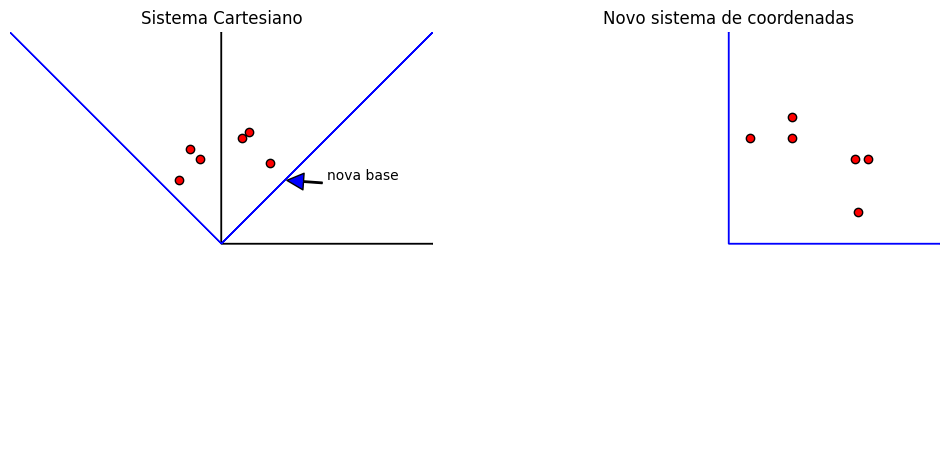

In [29]:
import matplotlib.pyplot as plt
import numpy as np



#### Gerando 6 pontos representados no sistema cartesiano
#### cuja base é e1=[1,0] e e2=[0,1]
Xc = np.array([[-0.1, -0.15, -0.2, 0.1, 0.13, 0.23],[0.4, 0.45, 0.3, 0.5, 0.53, 0.38]])

#### Considere uma nova base dada pelos vetores u1=[1,1] e u2[-1,1]
U = np.asarray([[1,-1],[1,1]])  # matriz de mudança de base
Yc = np.dot(U.T,Xc)             # coordenadas na nova base

f, (ax1, ax2)  = plt.subplots(1,2,figsize=(12,6))

ax1.axis('off')
ax1.set_aspect('equal')
ax1.set_title('Sistema Cartesiano');
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.arrow(0,0,1,0,color='black');
ax1.arrow(0,0,0,1,color='black');
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.arrow(0,0,1,1,color='blue');
ax1.arrow(0,0,-1,1,color='blue');
ax1.annotate('nova base', xy=(0.3, 0.3), xytext=(0.5, 0.3),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1),
             );

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_title('Novo sistema de coordenadas');
ax2.scatter(Yc[0,:],Yc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.arrow(0,0,1,0,color='blue');
ax2.arrow(0,0,0,1,color='blue');

No contexto de PCA, buscamos uma matriz de mudança de base $\mathbf{P}$ tal que

$$
\mathbf{Y}=\mathbf{P}\mathbf{X} \Longrightarrow \mathbf{Y}\mathbf{Y}^\top = \mathbf{D}
$$

onde $\mathbf{D}$ é uma matriz diagonal onde os elementos da diagonal correspondem a variância de cada uma das coordenadas.

Uma vez que $\mathbf{P}$ tenha sido calculada:

- as coordenadas dos pontos na nova base serão descorrelacionadas
- algumas das coordenadas terão variância próximo de zero (coordenadas relacionada com ruído nos dados)
- a dimensão dos dados poderá ser reduzida sem grandes perdas de informação

**Calculando a mudança de base**

$$
\mathbf{Y}=\mathbf{P}\mathbf{X}
$$

$$
\mathbf{Y}\mathbf{Y}^\top=(\mathbf{PX})(\mathbf{PX})^\top=\mathbf{P}\mathbf{X}\mathbf{X}^\top\mathbf{P}^\top
$$

---
### <font color='blue'> Teorema Espectral</font>

Se $\mathbf{A}$ é matriz simétrica, então:
$$
\mathbf{A}=\mathbf{UDU}^\top \rightarrow \mathbf{U}^\top\mathbf{AU}=\mathbf{D}
$$
onde $\mathbf{U}$ é matriz ortogonal contendo os autovetores de $\mathbf{A}$ e $\mathbf{D}$ é matriz diagonal contendo os autovalores reais de $\mathbf{A}$

---

$\mathbf{XX}^\top$ é uma matriz simétrica semi-definida positiva. Logo, os autovalores $\lambda _i$ são reais e não negativos. Armazenando os autovetores de $\mathbf{XX}^\top$ em uma matriz  $\mathbf{U}$ e fazendo:

$$\mathbf{P}=\mathbf{U}^\top$$

$$\mathbf{YY}^\top=\mathbf{U}^\top\mathbf{X}\mathbf{X}^\top\mathbf{U} = \mathbf{D}$$

$$
\mathbf{D}=
\begin{bmatrix}
cov(y_{1:},y_{1:}) & 0 & \ldots & 0 \\
0 & cov(y_{2:},y_{2:}) & \ldots & 0 \\
  &            & \vdots & \\
0 & 0 & \ldots & cov(y_{d:},y_{d:}) \\
\end{bmatrix}
$$

**Importante**: $cov(y_{i:},y_{i:}) = \lambda_i$, ou seja, os autovalores de $\mathbf{XX}^\top$ correspondem as variâncias das coordenadas na nova base. Os autovetores de $\mathbf{XX}^\top$ são os elementos da nova base, sendo que coordenadas distintas dos dados nesta nova base são "descorrelacionadas".

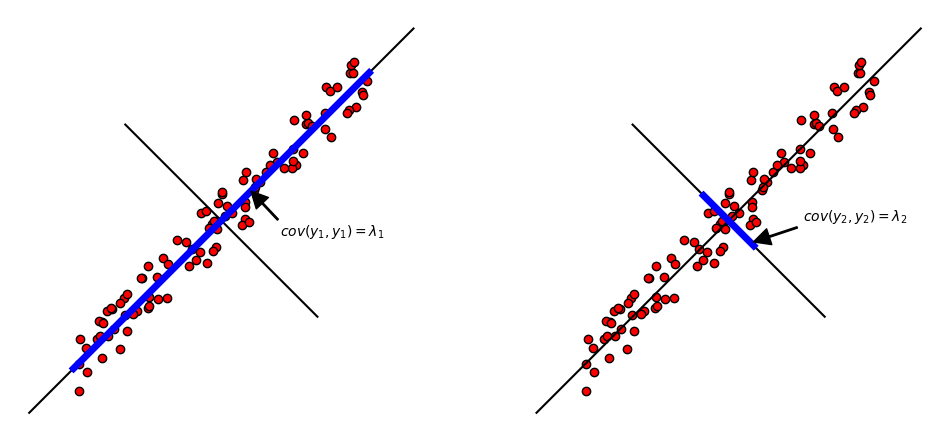

In [30]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

n = 100

#### figura da esquerda
Xc = np.zeros((2,n))
Xc[0,:] = np.random.uniform(-1,1,size=(1,n))
Xc[1,:] = Xc[0,:]+np.random.uniform(-0.2,0.2,size=(1,n))

#### figura da direita
ax1.axis('off')
ax1.set_aspect('equal')
ax1.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax1.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax1.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax1.plot([-1,1],[-1,1],color='blue',linewidth=5);
ax1.annotate(r'$cov(y_1,y_1)=\lambda_1$', xy=(0.2, 0.2), xytext=(0.4, -0.1),
              arrowprops=dict(facecolor='black', shrink=0.00,width=1),
              );

#### figura da direita
ax2.axis('off')
ax2.set_aspect('equal')
ax2.scatter(Xc[0,:],Xc[1,:],marker='o',color='red',edgecolor='black', linewidth=1);
ax2.plot([-1.3,1.3],[-1.3,1.3],color='black');
ax2.plot([-0.65,0.65],[0.65,-0.65],color='black');
ax2.plot([-0.17,0.17],[0.17,-0.17],color='blue',linewidth=5);
ax2.annotate(r'$cov(y_2,y_2)=\lambda_2$', xy=(0.15, -0.15), xytext=(0.5, 0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             );

As coordenadas dos pontos no novo sistema de coordenadas são dados por:
$$
\mathbf{y_i}=\mathbf{U}^\top\mathbf{x_i}
$$

---
### <font color='blue'>Quociente de Rayleigh</font>
    
Assumindo que os autovalores estão ordenados $\lambda_1\geq\cdots\geq\lambda_d$, o _Quociente de Rayleigh_ assegura:

$$
\mathbf{u}_1^\top\mathbf{XX}^\top\mathbf{u}_1=\lambda_1 \rightarrow \mathbf{u}_1 \mbox{ (direção de maior variância)}\\
\mathbf{u}_d^\top\mathbf{XX}^\top\mathbf{u}_d=\lambda_d \rightarrow \mathbf{u}_d \mbox{ (direção de menor variância)}
$$


---

Desta forma, pode-se desprezar as direções (coordenadas) de menor variância, uma vez que estas tipicamente correspondem a ruído nos dados

$$
\hat{\mathbf{Y}}=
\begin{bmatrix}
y_{11} & y_{21} & \cdots & y_{n1} \\
       &        & \vdots & \\
y_{1k} & y_{2k} & \cdots & y_{n} \\
0 & 0 & \cdots & 0 \\
       &        & \vdots & \\
0 & 0 & \cdots & 0 \\
\end{bmatrix}
$$

pode-se reconstuir os dados "sem ruído" na base original fazendo:

$$
\hat{\mathbf{X}}=\mathbf{U}\hat{\mathbf{Y}}
$$

### <font color='blue'>Quantidade de Informação Capturada em Cada Direção Principal</font>

Como visto acima, as direções com variância próximas de zero podem ser desconsideradas, uma vez que correspondem ao ruído inerente dos dados.

Podemos medir a "quantidade de informação" capturada por cada direção através da chamada _proporção de variância explicada_, que matemáticamente é dada por:

$$
\frac{\lambda_i}{\lambda_1+\cdots+\lambda_d}
$$

Para cada $i$, o valor acima mede a proporção da variância capturada por cada direção principal. Desta forma, se quisermos encontrar quantas direções são necessárias para
capturar 90% da variância, basta encontrarmos o menor $k$ tal que:

$$
\frac{1}{\lambda_1+\cdots+\lambda_d}\sum_{i=1}^k \lambda_i \geq 0.9
$$

______

# Calculando PCA em Python

In [31]:
###########
# importing the packages
###########
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
###########
# reading data_frame
###########

file_name = 'isolet1234.csv'

df = pd.read_csv(file_name)
print(df.shape)

(6238, 618)


In [33]:
###########
# printing the 10 rows and 8 columns of the DataFrame
###########

print(df.iloc[:10,:8])

       c0      c1      c2      c3      c4      c5      c6      c7
0 -0.4394 -0.0930  0.1718  0.4620  0.6226  0.4704  0.3578  0.0478
1 -0.4348 -0.1198  0.2474  0.4036  0.5026  0.6328  0.4948  0.0338
2 -0.2330  0.2124  0.5014  0.5222 -0.3422 -0.5840 -0.7168 -0.6342
3 -0.3808 -0.0096  0.2602  0.2554 -0.4290 -0.6746 -0.6868 -0.6650
4 -0.3412  0.0946  0.6082  0.6216 -0.1622 -0.3784 -0.4324 -0.4358
5 -0.4634  0.0306  0.3546  0.4448 -0.1022 -0.4184 -0.6388 -0.4370
6 -0.3364 -0.0102  0.2132  0.2018 -0.6146 -0.8380 -0.8130 -0.7240
7 -0.4798 -0.1580  0.1764  0.1820 -0.6378 -0.8400 -0.7280 -0.6654
8 -0.3928  0.0424  0.2166  0.2124 -0.4564 -0.6200 -0.7112 -0.6602
9 -0.5494 -0.0940  0.2868  0.2964 -0.5326 -0.7204 -0.7518 -0.7398


In [34]:
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c608,c609,c610,c611,c612,c613,c614,c615,c616,c617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,-0.5742,0.1050,0.4936,0.3986,-0.2058,-0.4130,-0.4188,-0.5194,-0.5080,-0.4878,...,0.5000,0.6800,0.8200,0.8400,0.8400,0.7400,0.8200,0.6400,0.3200,22.0
6234,-0.4520,0.0154,0.5078,0.8978,0.7956,0.4366,0.2352,0.1300,0.0682,0.3004,...,0.5000,0.2250,0.7500,0.8750,0.6750,0.6000,0.4500,-0.1250,-0.2250,23.0
6235,-0.5824,-0.1646,0.1406,0.6224,0.6626,0.3172,0.0924,0.0120,-0.1646,-0.1326,...,0.8068,0.7392,0.7392,0.6908,0.7294,0.7004,0.6812,0.5170,0.3430,24.0
6236,0.0160,0.8168,1.0000,0.7814,0.4084,0.2122,-0.2218,-0.6848,-0.8424,-0.7588,...,0.0344,0.0344,-0.0344,0.4252,0.2874,-0.0114,0.1034,-0.1954,-0.8620,25.0


In [35]:
###########
# converting data columns to numpy array
###########

data = df.values
print(type(data))

<class 'numpy.ndarray'>


In [36]:
data

array([[-4.394e-01, -9.300e-02,  1.718e-01, ...,  5.898e-01, -4.872e-01,
         1.000e+00],
       [-4.348e-01, -1.198e-01,  2.474e-01, ...,  4.546e-01, -9.100e-02,
         1.000e+00],
       [-2.330e-01,  2.124e-01,  5.014e-01, ...,  1.588e-01, -4.762e-01,
         2.000e+00],
       ...,
       [-5.824e-01, -1.646e-01,  1.406e-01, ...,  5.170e-01,  3.430e-01,
         2.400e+01],
       [ 1.600e-02,  8.168e-01,  1.000e+00, ..., -1.954e-01, -8.620e-01,
         2.500e+01],
       [-6.116e-01, -1.040e-01,  2.566e-01, ...,  7.140e-02, -8.920e-02,
         2.600e+01]])

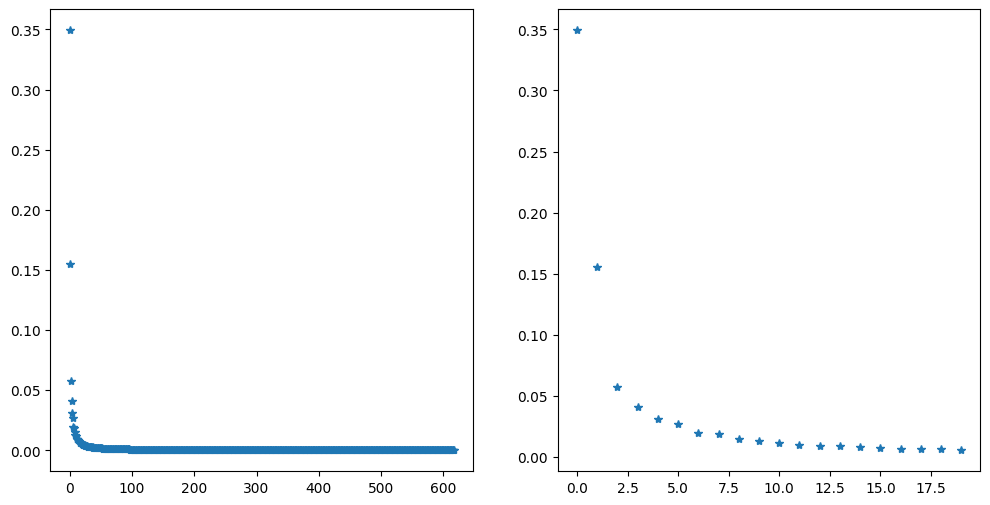

In [37]:
from sklearn.decomposition import PCA

data_pca=PCA(svd_solver='full')
data_transformed = data_pca.fit(data)

#print(data_transformed.explained_variance_)
#print('\n ',data_transformed.explained_variance_ratio_)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(data_pca.explained_variance_ratio_, '*')
ax2.plot(data_pca.explained_variance_ratio_[:20], '*')

(6238, 2)


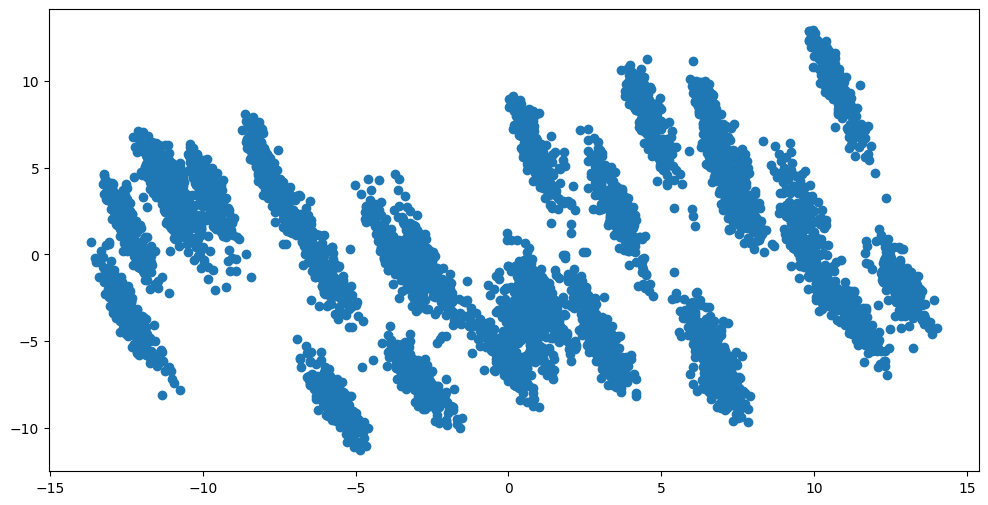

In [38]:
###########
# projecting data in 2D
###########

pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(data)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])